In [16]:
## DATAPREP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datapath = "data/gbsg.csv"

class SurvivalDataset:
    def __init__(self,df:pd.DataFrame, time_col: str, event_col: str, features: list[str] = []):
        self.df = df
        self.time_col = time_col
        self.event_col = event_col
        if not features:
            self.features = [c for c in df.columns if c not in [time_col, event_col]]
        else:
            self.features = features
            
        self.time_df = df.loc[:, time_col]
        self.event_df = df.loc[:, event_col]
        self.features_df = df.loc[:, features]
    
df = pd.read_csv(datapath).drop(columns=['pid'])
dataset = SurvivalDataset(df=df, time_col='rfstime', event_col='status')

In [17]:
from lifelines import (
    WeibullAFTFitter,
    LogLogisticAFTFitter,
    LogNormalAFTFitter
)

In [18]:
models = {
    'WeibullAFT': WeibullAFTFitter(),
    'LogLogisticAFT': LogLogisticAFTFitter(),
    'LogNormalAFT': LogNormalAFTFitter()
}
models_results = {m:{} for m in models}

for model in models:
    print(f"Fitting model: {model} ...")
    try:
        models[model] = models[model].fit(dataset.df, duration_col=dataset.time_col, event_col=dataset.event_col)
    except Exception as e:
        print(f"Error fitting model {model}: {e}")

Fitting model: WeibullAFT ...
Fitting model: LogLogisticAFT ...
Fitting model: LogNormalAFT ...


In [19]:
for m in models:
    try:
        models_results[m]['AIC'] = models[m].AIC_
        models_results[m]['BIC'] = models[m].BIC_
        models_results[m]['log_likelihood'] = models[m].log_likelihood_
    except Exception as e:
        print(f"\033[91m{m} does not have AIC/BIC/log_likelihood attributes.\033[0m")

In [27]:
models_results_df = pd.DataFrame(models_results).T
models_results_df.dropna().sort_values(by='AIC')

,AIC,BIC,log_likelihood
LogNormalAFT,5139.910296,5132.972052,-2559.955148
LogLogisticAFT,5153.993049,5147.054804,-2566.996525
WeibullAFT,5182.393224,5175.454979,-2581.196612


<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

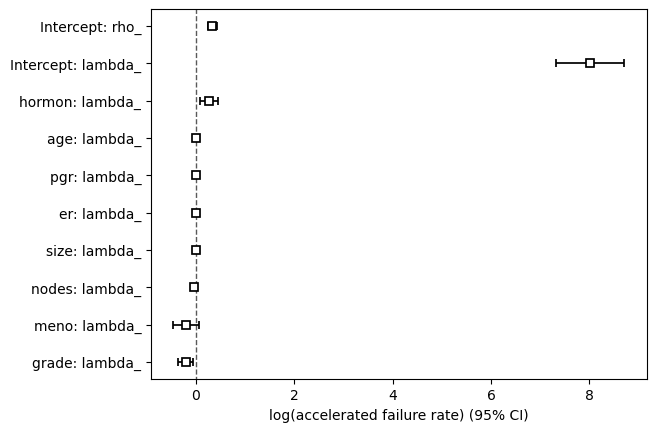

In [22]:
models['WeibullAFT'].plot()

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

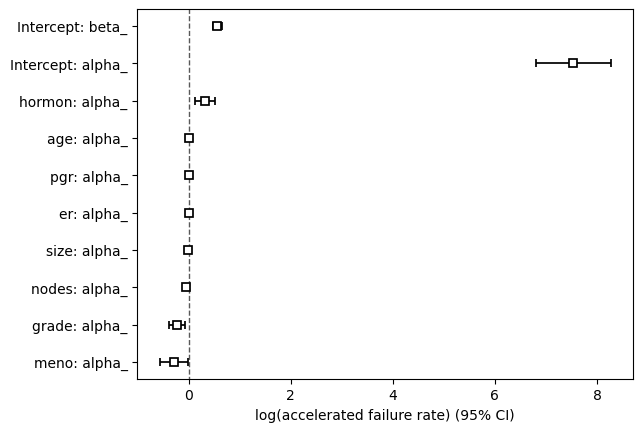

In [24]:
models['LogLogisticAFT'].plot()

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

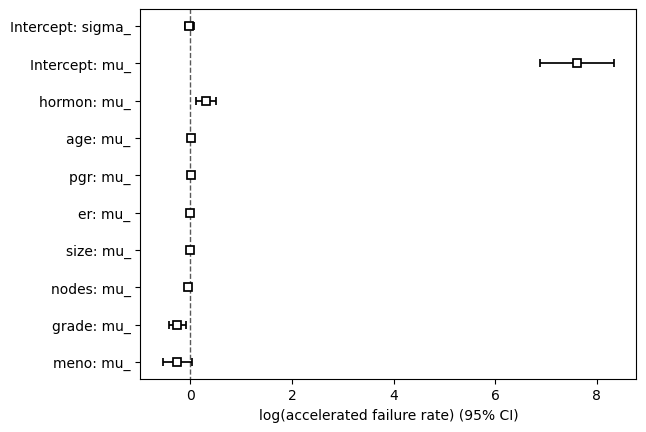

In [25]:
models['LogNormalAFT'].plot()